In [3]:
from multiprocessing import cpu_count
from pathlib import Path
import tqdm
from concurrent.futures import as_completed, ProcessPoolExecutor
import itertools
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [6]:
BASE_PATH = Path(".")
dfs = []
dir_name = BASE_PATH
for f in dir_name.glob("limits_*.csv"):
    print(f"Processing {f}")
    d = pd.read_csv(BASE_PATH / f)
    types = d.dtypes
    ok = True
    for c in d.columns:
        if not c.startswith("p_") or c.endswith("profit_means"):
            continue
        if types[c] != np.int64 and types[c] != np.float64:
            print(f"{c} in {f} is not numeric")
        try:
            d[c] = d[c].astype(np.float64)
        except:
            print(f"Failed to convert {c} in {f} to float, will ignore it")
            ok = False
    if ok:
        dfs.append(d)
    
df = pd.concat(dfs, ignore_index=True)
if len(df) < 1:
    print("No data")
print(f"Found {len(df)} data records")

p_disposal_cost in limits_b16.csv is not numeric
Failed to convert p_disposal_cost in limits_b16.csv to float, will ignore it
p_shortfall_penalty in limits_b16.csv is not numeric
Failed to convert p_shortfall_penalty in limits_b16.csv to float, will ignore it
p_max_productivity in limits_b16.csv is not numeric
Failed to convert p_max_productivity in limits_b16.csv to float, will ignore it
Found 3683921 data records


In [7]:
PARAMS = dict(
    disposal_cost=(0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1),
    shortfall_penalty=(0.0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1),
    max_productivity=(1.0, 0.9, 0.8, 0.6, 0.5),
    profit_means=((0.0, 0.1), (0.1, 0.1), (0.1, 0.2), (0.0, 0.2)),
)
v = [f"p_{_}" for _ in PARAMS.keys()] + ["level"]
stats = (
    df.groupby(v)[["max_util", "min_util"]]
    .describe()
    .reset_index()
)
stats.to_csv(dir_name / f"stats.csv", index=False)
print(stats)

     p_disposal_cost p_shortfall_penalty p_max_productivity p_profit_means  \
                                                                           
0               0.0                0.0                0.5     (0.0, 0.1)   
1               0.0                0.0                0.5     (0.0, 0.1)   
2               0.0                0.0                0.5     (0.0, 0.2)   
3               0.0                0.0                0.5     (0.0, 0.2)   
4               0.0                0.0                0.5     (0.1, 0.1)   
...             ...                ...                ...            ...   
2555            1.0                1.0                1.0     (0.0, 0.2)   
2556            1.0                1.0                1.0     (0.1, 0.1)   
2557            1.0                1.0                1.0     (0.1, 0.1)   
2558            1.0                1.0                1.0     (0.1, 0.2)   
2559            1.0                1.0                1.0     (0.1, 0.2)   

     leve

Plotting disposal_cost
Plotting shortfall_penalty
Plotting max_productivity
Plotting profit_means


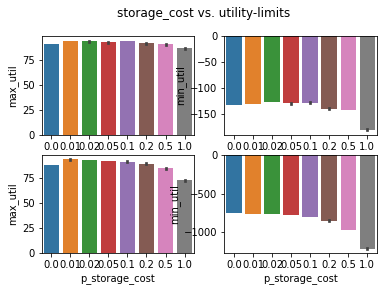

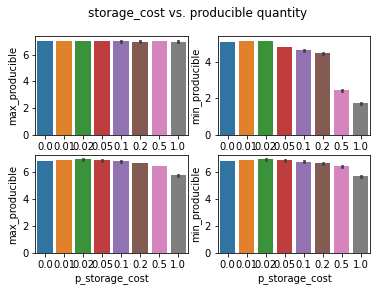

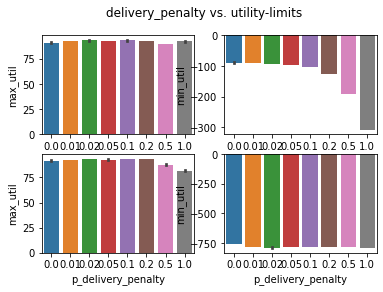

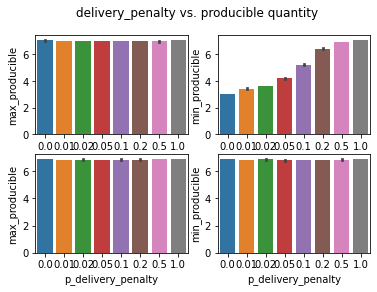

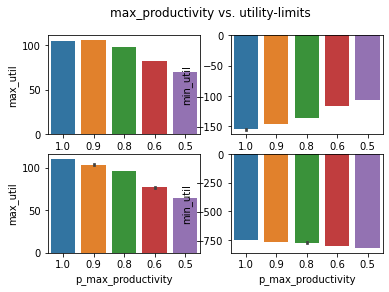

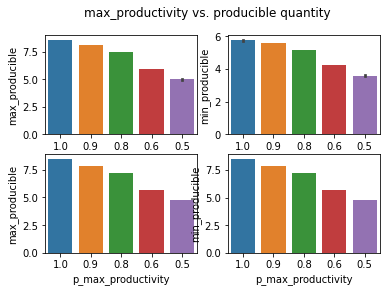

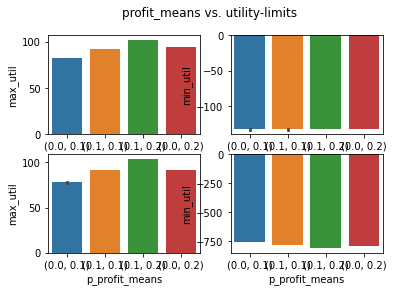

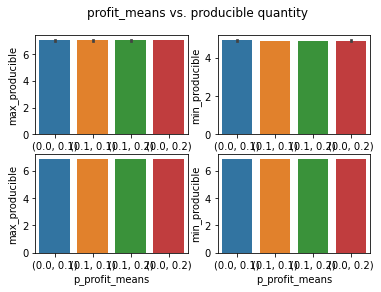

In [10]:
for k in PARAMS.keys():
    if len(PARAMS[k]) < 2:
        continue
    df[f"p_{k}"] = df[f"p_{k}"].apply(lambda x: str(x))
    print(f"Plotting {k}")
    fig, axs = plt.subplots(2, 2)
    sns.barplot(
        data=df.loc[df.level == 0, :], x=f"p_{k}", y="max_util", ax=axs[0, 0]
    )
    sns.barplot(
        data=df.loc[df.level == 0, :], x=f"p_{k}", y="min_util", ax=axs[0, 1]
    )
    sns.barplot(
        data=df.loc[df.level == 1, :], x=f"p_{k}", y="max_util", ax=axs[1, 0]
    )
    sns.barplot(
        data=df.loc[df.level == 1, :], x=f"p_{k}", y="min_util", ax=axs[1, 1]
    )
    plt.suptitle(f"{k} vs. utility-limits")
    plt.savefig(f"utils_{k}.pdf", bbox_inches='tight', pad_inches=0)
    plt.savefig(f"utils_{k}.png", bbox_inches='tight', pad_inches=0)
    #fig.show()
    fig, axs = plt.subplots(2, 2)
    sns.barplot(
        data=df.loc[df.level == 0, :], x=f"p_{k}", y="max_producible", ax=axs[0, 0]
    )
    sns.barplot(
        data=df.loc[df.level == 0, :], x=f"p_{k}", y="min_producible", ax=axs[0, 1]
    )
    sns.barplot(
        data=df.loc[df.level == 1, :], x=f"p_{k}", y="max_producible", ax=axs[1, 0]
    )
    sns.barplot(
        data=df.loc[df.level == 1, :], x=f"p_{k}", y="min_producible", ax=axs[1, 1]
    )
    plt.suptitle(f"{k} vs. producible quantity")
    plt.savefig(f"producible_{k}.pdf", bbox_inches='tight', pad_inches=0)
    plt.savefig(f"producible_{k}.png", bbox_inches='tight', pad_inches=0)
    #fig.show()